In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import ssl
from tensorflow.keras.datasets import mnist

# Set SSL certificate file
ssl._create_default_https_context = ssl._create_unverified_context

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 3s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [8]:
np.min(x_train), np.max(x_train)

(0, 255)

In [9]:
np.isnan(x_train).sum()

0

In [11]:
print(np.unique(y_train)) # output class

[0 1 2 3 4 5 6 7 8 9]


<h3>Visualizasion</h3>

In [12]:
x_train[0]
x_train[0][0:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

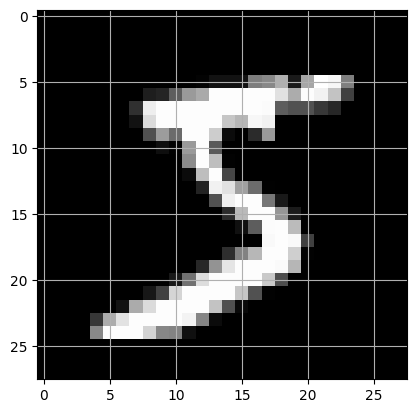

In [14]:
idx = 0
img = x_train[0]
plt.imshow(img, cmap='gray')

plt.grid()

In [15]:
y_train[idx]

5

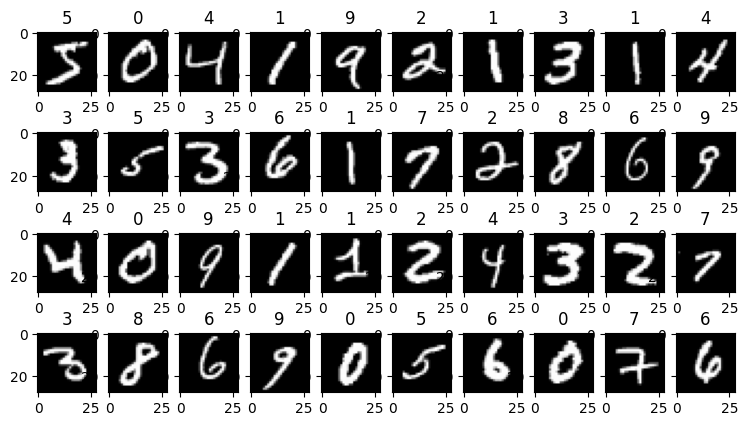

In [16]:
def visual_multi(i):
    nplot = 40
    fig = plt.figure(figsize=(9, 5))
    for j in range(nplot):
            plt.subplot(4, 10, j+1)
            plt.imshow(x_train[i+j], cmap='gray')
            plt.title(y_train[i+j])
            
    plt.show()
    
visual_multi(0)

In [17]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [18]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
# Normalize

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [20]:
np.min(x_train), np.max(x_test)

(0.0, 1.0)

In [22]:
x_train[0, :, 7:8, 0].round(2)

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.19],
       [0.07],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.67],
       [0.99],
       [0.99],
       [0.  ],
       [0.  ],
       [0.  ]], dtype=float32)

In [23]:
num_samples = 10000

x_train = x_train[:num_samples]
x_test = x_test[:num_samples]

y_train = y_train[:num_samples]
y_test = y_test[:num_samples]

In [24]:
x_train.shape

(10000, 28, 28, 1)

In [29]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


<h3>Build Model</h3>

In [35]:
num_classes = len(np.unique(y_train))
num_classes

10

In [36]:
in_shape = x_train.shape[1:]
in_shape

(28, 28, 1)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

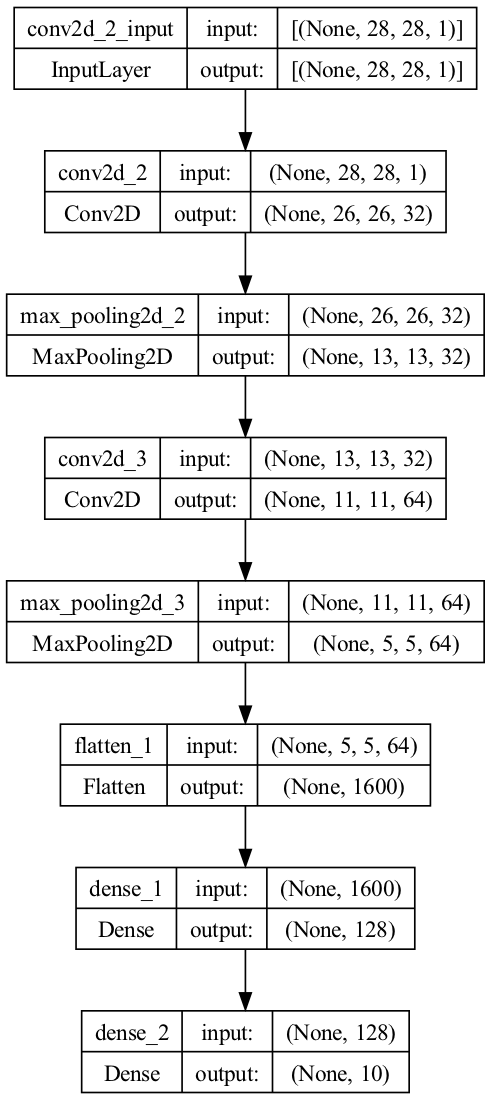

In [39]:
import pydotplus
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='convolu_digit.png', show_shapes=True, show_layer_names=True, dpi=120)

In [40]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
import time

start = time.time()

history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_split=0.15)

end = time.time()

print(f'time taken {end-start:.3f} sce')

Epoch 1/10
67/67 [==============================] - 1s 19ms/step - loss: 0.6945 - accuracy: 0.8029 - val_loss: 0.2820 - val_accuracy: 0.9207
Epoch 2/10
67/67 [==============================] - 1s 18ms/step - loss: 0.1791 - accuracy: 0.9468 - val_loss: 0.1835 - val_accuracy: 0.9433
Epoch 3/10
67/67 [==============================] - 1s 19ms/step - loss: 0.1151 - accuracy: 0.9672 - val_loss: 0.1353 - val_accuracy: 0.9600
Epoch 4/10
67/67 [==============================] - 1s 18ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.1285 - val_accuracy: 0.9600
Epoch 5/10
67/67 [==============================] - 1s 18ms/step - loss: 0.0688 - accuracy: 0.9794 - val_loss: 0.1074 - val_accuracy: 0.9700
Epoch 6/10
67/67 [==============================] - 1s 18ms/step - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.1050 - val_accuracy: 0.9747
Epoch 7/10
67/67 [==============================] - 1s 19ms/step - loss: 0.0419 - accuracy: 0.9860 - val_loss: 0.0820 - val_accuracy: 0.9760
Epoch 8/10
67

In [43]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss : ",score[0])
print(f"Test accuracy : {score[1]:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9777
Test loss :  0.07317258417606354
Test accuracy : 0.9777


Text(0.5, 1.0, 'Accuracy Cruve')

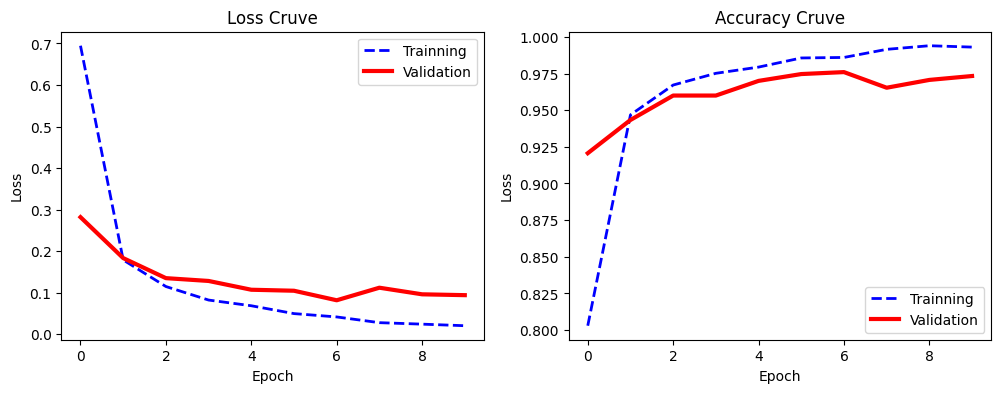

In [44]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Cruve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Accuracy Cruve')

<h3>Prediction x_test</h3>

In [45]:
y_pred = model.predict(x_test)

y_pred[:8].round(2)

313/313 [==============================] - 1s 3ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [46]:
y_pred_cls = np.argmax(y_pred, axis=1)

y_pred_cls[:10].round(2)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [48]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [49]:
idx_miss = np.where(y_pred_cls != y_test)

print(len(idx_miss[0]))

223


In [51]:
print(idx_miss[0][:15])

[ 18  62 184 247 266 320 321 340 445 449 543 582 591 619 684]


In [54]:
y_test[idx_miss][:15]

array([3, 9, 8, 4, 8, 9, 2, 5, 6, 3, 8, 8, 8, 1, 7], dtype=uint8)

In [55]:
y_pred_cls[idx_miss][:15]

array([2, 5, 2, 2, 0, 8, 7, 3, 0, 5, 7, 2, 2, 8, 3])

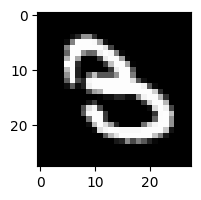

In [56]:
fig = plt.figure(figsize=(2, 2))

plt.imshow(x_test[idx_miss][0].reshape(28, 28), cmap='gray')

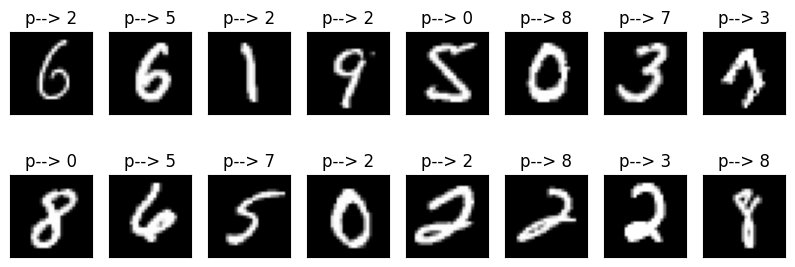

In [57]:
nplots = 16

fig = plt.figure(figsize=(10, 3.4))

for j, k in enumerate(idx_miss[0]):
    plt.subplot(2, 8, j+1)
    plt.imshow(x_train[k].reshape(28, 28), cmap='gray')
    plt.title('p--> {}'.format(y_pred_cls[k]))
    plt.xticks([])
    plt.yticks([])
    if j >= nplots-1:
        break
    
plt.show()

<h3>Save Model</h3>

In [58]:
model.save('digitmodel.h5')